In [74]:
import json
import db_util as db
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
# minus 표시 
# 한글 쓸때 필수다
mpl.rcParams['axes.unicode_minus'] = False
plt.rc('font', family='Malgun Gothic')

In [75]:
# 월별 매출/ 이익

sql ='''
    SELECT DATE_FORMAT(s.sdate,'%Y-%m') AS 월, 
     SUM(pprice*sunit) AS 매출, 
     SUM(pprice*sunit-pcost*sunit) AS 이익
    FROM products AS p
    JOIN sales AS s
    WHERE p.pid=s.spid
    GROUP BY 월
    order by 월
'''
df = db.get_db(sql)
df.columns = ('월','매출','이익')


In [76]:

df.매출 = pd.to_numeric(df.매출)
df.이익 = pd.to_numeric(df.이익)
df

,월,매출,이익
0,2020-01,3828500.0,1111860.0
1,2020-02,4232900.0,1004948.0
2,2020-03,3631700.0,803057.0
3,2020-04,4645200.0,920176.0
4,2020-05,5172000.0,964778.0
5,2020-06,4500100.0,1136116.0
6,2020-07,4424000.0,1070471.0
7,2020-08,3486400.0,845483.0
8,2020-09,3621800.0,557073.0
9,2020-10,4938200.0,1510270.0


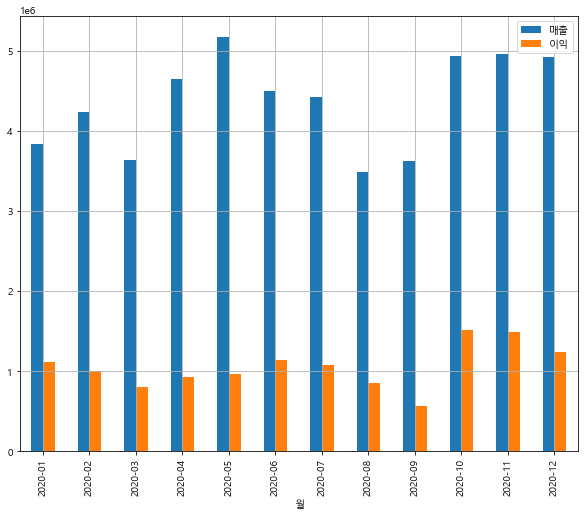

In [77]:
df.plot.bar(x='월',figsize=(10,8))
plt.grid()
plt.show()

In [78]:
# 거래처별 매출 /이익
sql= '''
    SELECT scompany, 
     SUM(pprice*sunit) AS 매출, 
     SUM(pprice*sunit-pcost*sunit) AS 이익
    FROM products AS p
    JOIN sales AS s
    WHERE p.pid=s.spid
    GROUP BY scompany
'''
df2 = db.get_db(sql)
df2.columns = ('거래처','매출','이익')

In [79]:
df2.매출 = pd.to_numeric(df2.매출)
df2.이익 = pd.to_numeric(df2.이익)
df2

,거래처,매출,이익
0,glo,12655200.0,2771384.0
1,DOROKO,9850800.0,2742240.0
2,송샘,8180300.0,2294540.0
3,다이서,9749600.0,2037775.0
4,RG,11925800.0,2799593.0


<AxesSubplot:ylabel='거래처'>

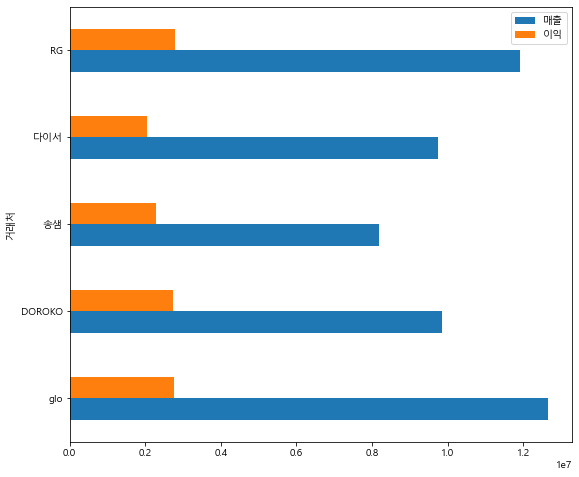

In [80]:
df2.plot.barh(x='거래처',figsize=(9,8))
# index 설정 여부가 그래프 그릴때 영향을 주는가?

<AxesSubplot:ylabel='거래처'>

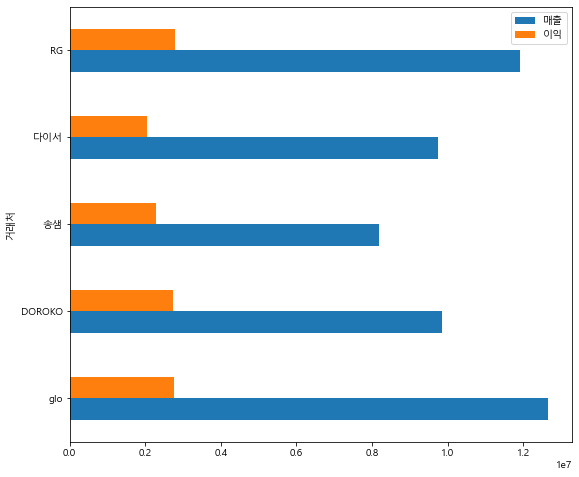

In [97]:
df2.set_index('거래처', inplace=True)

df2.plot.barh(figsize=(9,8))
# index 설정 여부가 그래프 그릴때 영향을 주는가?
# index를 설정하고 하는것이 조금 편할듯 아직 익숙하지 않아 헷갈린다.,

In [81]:
# 거래처별 판매제품및 수량
sql = '''
    SELECT s.scompany as 거래처, p.pname as 판매제품, 
     SUM(sunit) AS 수량
    FROM products AS p
    JOIN sales AS s
    WHERE p.pid=s.spid
    GROUP BY scompany, pname
    ORDER BY s.scompany
'''
df3 = db.get_db(sql)
df3.columns = ('거래처','판매제품','수량')
df3.수량 = pd.to_numeric(df3.수량)
df3

,거래처,판매제품,수량
0,DOROKO,고향만두,20.0
1,DOROKO,냉장고,14.0
2,DOROKO,맛동산,11.0
3,DOROKO,바나나킥,15.0
4,DOROKO,뺵미러,18.0
...,...,...,...
80,송샘,오감자,11.0
81,송샘,오레오,12.0
82,송샘,전자레인지,45.0
83,송샘,초코파이,20.0


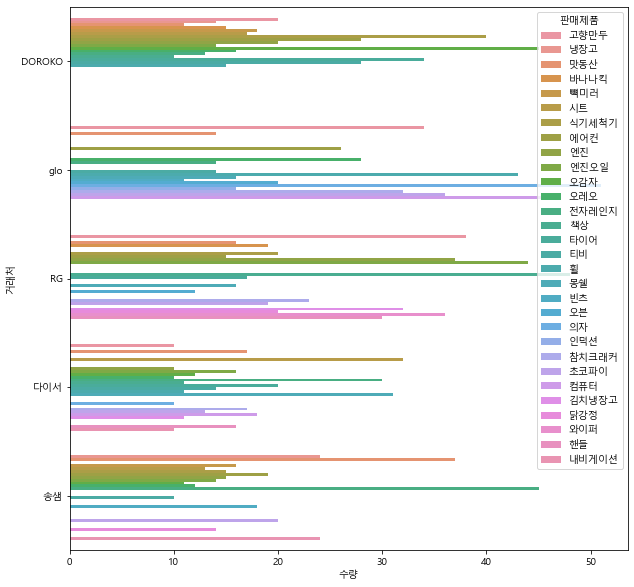

In [82]:
plt.figure(figsize=(10,10))
sns.barplot(y='거래처', x='수량', hue='판매제품', data=df3, orient='horizonal')

plt.show()

In [91]:
df3.set_index(['거래처','판매제품'], inplace=True)
df3.reset_index()['판매제품'].unique()
df3

수량
거래처    판매제품       
DOROKO 고향만두   20.0
       냉장고    14.0
       맛동산    11.0
       바나나킥   15.0
       뺵미러    18.0
...            ...
송샘     오감자    11.0
       오레오    12.0
       전자레인지  45.0
       초코파이   20.0
       티비     10.0

[85 rows x 1 columns]

In [95]:
df3.reset_index()['거래처'].unique() #유니크 곂쳐져 있는거 뺴올때 좋다

array(['DOROKO', 'glo', 'RG', '다이서', '송샘'], dtype=object)

<ipython-input-94-5c8887fad26f>:2: PerformanceWarning: indexing past lexsort depth may impact performance.
  sdf=df3.loc[(company,)]


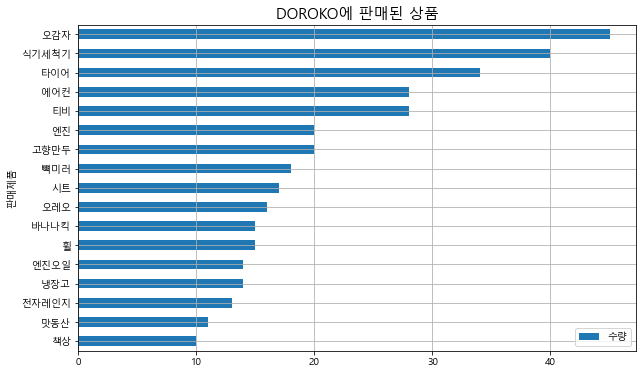

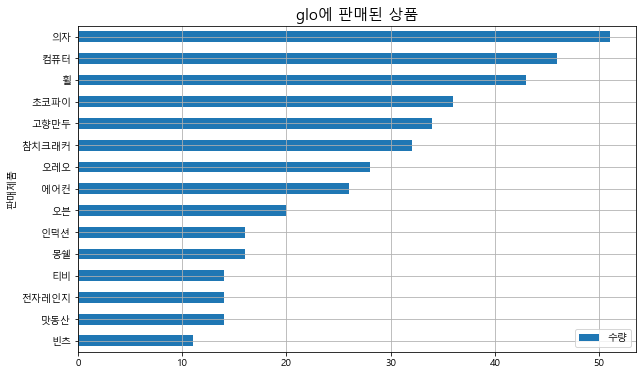

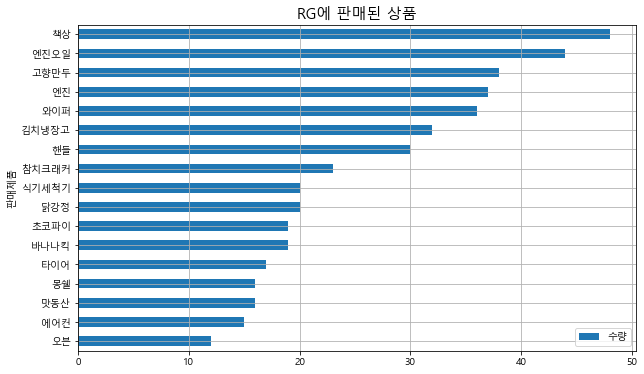

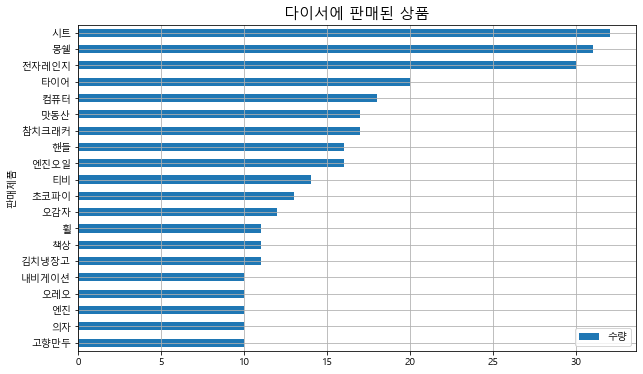

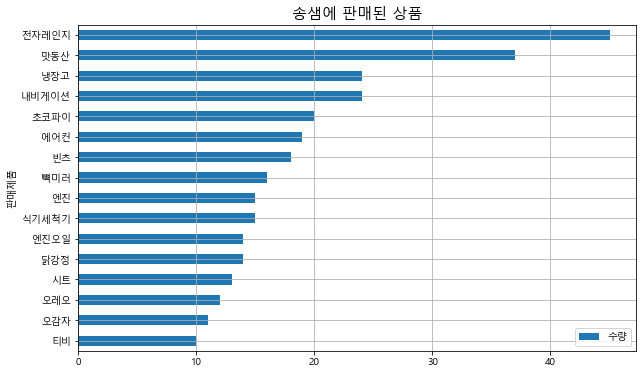

In [94]:

for company in df3.reset_index()['거래처'].unique():
    sdf=df3.loc[(company,)]
    sdf.sort_values(by='수량').plot.barh(figsize=(10,6))
    plt.title(f'{company}에 판매된 상품', size=15)
    plt.grid()
    plt.show()

In [ ]:
#제품별 판매수량/ 매출 /이익
sql = '''
    SELECT p.pname AS 제품,
     SUM(sunit) AS 판매수량,
     SUM(pprice*sunit) AS 매출,
     SUM(pprice*sunit-pcost*sunit) AS 이익
    FROM products AS p
    JOIN sales AS s
    WHERE p.pid=s.spid
    GROUP BY p.pname
'''
df4 = db.get_db(sql)

df4.columns = ('제품','판매수량','매출', '이익')
df4.판매수량 = pd.to_numeric(df4.판매수량)
df4.매출 = pd.to_numeric(df4.매출)
df4.이익 = pd.to_numeric(df4.이익)
df4

,제품,판매수량,매출,이익
0,고향만두,102.0,2478600.0,1115370.0
1,엔진,82.0,2812600.0,1153166.0
2,의자,61.0,2592500.0,440725.0
3,엔진오일,88.0,1601600.0,560560.0
4,오레오,66.0,3214200.0,996402.0
5,오감자,68.0,1081200.0,43248.0
6,내비게이션,34.0,431800.0,168402.0
7,휠,69.0,807300.0,137241.0
8,맛동산,95.0,1491500.0,462365.0
9,바나나킥,34.0,761600.0,121856.0


<AxesSubplot:xlabel='제품'>

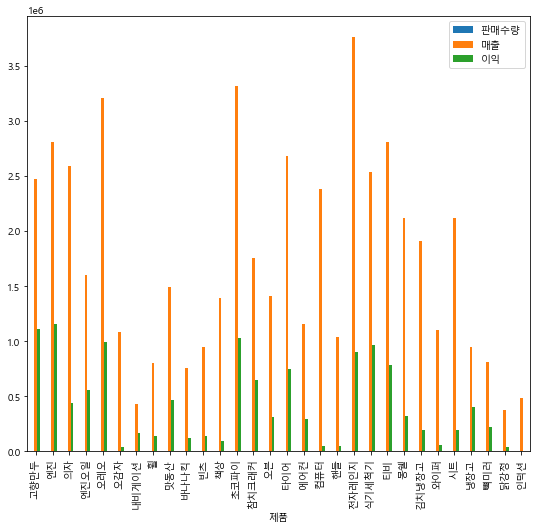

In [ ]:
df4.plot.bar(x='제품',figsize=(9,8))

In [ ]:
# 카테고리별 매출/ 이익 표 및 그래프

sql = '''
    SELECT p.pcategory, 
     SUM(pprice*sunit) AS 매출, 
     SUM(pprice*sunit-pcost*sunit) AS 이익
    FROM products AS p
    JOIN sales AS s
    WHERE p.pid=s.spid
    GROUP BY p.pcategory
'''

df5 = db.get_db(sql)
df5.columns = ('카테고리','매출', '이익')
df5.매출 = pd.to_numeric(df5.매출)
df5.이익 = pd.to_numeric(df5.이익)
df5

,카테고리,매출,이익
0,과자,17544000.0,4919216.0
1,자동차관련,14569500.0,3577613.0
2,가전제품 및 인테리어,20248200.0,4148703.0


<AxesSubplot:ylabel='카테고리'>

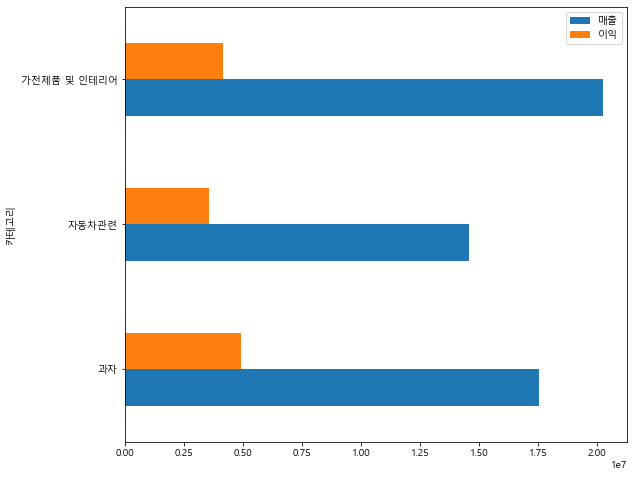

In [ ]:
df5.plot.barh(x='카테고리',figsize=(9,8))